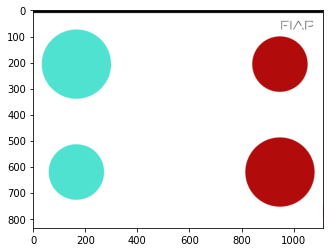

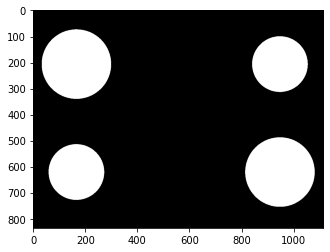

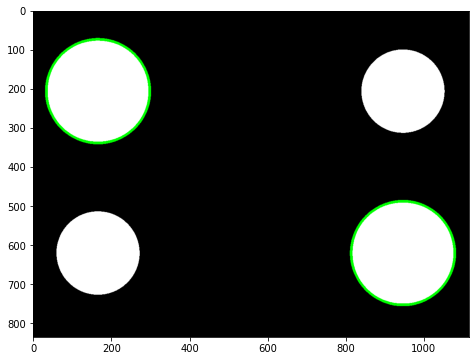

posição do centro da figura 1:  945 620
posição do centro da figura 2:  165 206


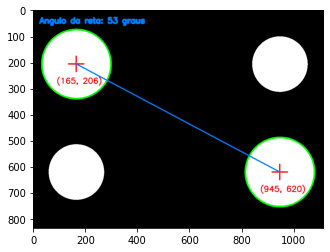

In [53]:
import cv2
import math
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('circulo.png')

sw_circulo = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.imshow(sw_circulo)
plt.show()

#Tranforma a imagem em preto e branco
circulo_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

circulo_hsv_lower = np.array([0, 50, 100])
circulo_hsv_higher = np.array([100, 255, 255])

mask_hsv = cv2.inRange(circulo_hsv, circulo_hsv_lower, circulo_hsv_higher)

plt.imshow(mask_hsv, cmap="Greys_r", vmin=0, vmax=255)

plt.show()

#Desenha o contorno das figuras encontradas
circulo, _ = cv2.findContours(mask_hsv, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

mask_rgb = cv2.cvtColor(mask_hsv, cv2.COLOR_GRAY2RGB)
circulo_img = mask_rgb.copy()

cv2.drawContours(circulo_img, circulo, 1, [0, 255, 0], 5);
cv2.drawContours(circulo_img, circulo, 3, [0, 255, 0], 5);

plt.figure(figsize=(8,6))
plt.imshow(circulo_img);
plt.show()

#Calcula das matrizes para encontrar o centro das figuras
cnt1 = circulo[3]
cnt = circulo[1]

M = cv2.moments(cnt)
M1 = cv2.moments(cnt1)

cx = int(M['m10']/M['m00'])
cy = int(M['m01']/M['m00'])
cx1 = int(M1['m10']/M1['m00'])
cy1 = int(M1['m01']/M1['m00'])
print("posição do centro da figura 1: ",cx, cy)
print("posição do centro da figura 2: ",cx1, cy1)

#Adiciona um + no centro da figura
jao_Contorno = 30
color_Contorno = (255,0,0)
thick_Contorno = 3

area = cv2.contourArea(cnt)
area1 = cv2.contourArea(cnt1)

cv2.line(circulo_img,(cx - jao_Contorno,cy),(cx + jao_Contorno,cy),color_Contorno,thick_Contorno)
cv2.line(circulo_img,(cx,cy - jao_Contorno),(cx, cy + jao_Contorno),color_Contorno,thick_Contorno)

cv2.line(circulo_img,(cx1 - jao_Contorno,cy1),(cx1 + jao_Contorno,cy1),color_Contorno,thick_Contorno)
cv2.line(circulo_img,(cx1,cy1 - jao_Contorno),(cx1, cy1 + jao_Contorno),color_Contorno,thick_Contorno)

#Adiciona uma linha conectando o centro dos circulos maiores
color_linha = (0,125,255)
thick_linha = 3
cv2.line(circulo_img, (cx,cy), (cx1,cy1), color_linha, thick_linha);

#Adiciona um texto identificando o centro da figura
font = cv2.FONT_HERSHEY_SIMPLEX;
text = cx, cy;
text1 = cx1 , cy1;
origem = (cx - 75,cy + 75);
origem1 = (cx1 - 75,cy1 + 75);

cv2.putText(circulo_img, str(text), origem, font,1,color_Contorno,2,cv2.LINE_AA);
cv2.putText(circulo_img, str(text1), origem1, font,1,color_Contorno,2,cv2.LINE_AA);

#Calculo da angulação da reta
angulo_linha = math.tan((cy1-cy)/(cx1-cx)) * 90;

font_reta = cv2.FONT_HERSHEY_SIMPLEX;
text = "Angulo da reta: {0} graus".format (math.ceil(angulo_linha))
cv2.putText(circulo_img, text, (25,50), font,1,(0,125,255),5,cv2.LINE_AA);

plt.imshow(circulo_img);
plt.show();